# Import stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create the random walks

## Create the increments

In [2]:
steps=10000
lever_count=10

increments = np.array([np.random.normal(loc=0, scale=0.01, size=steps-1) for i in range(lever_count)])
increments

array([[-0.01134032,  0.00717932, -0.00090524, ...,  0.0145377 ,
        -0.00486236,  0.00868831],
       [ 0.02438199,  0.0066627 ,  0.00123663, ...,  0.00212788,
        -0.01060452, -0.008486  ],
       [-0.01122229, -0.01783797,  0.00750884, ...,  0.00083169,
         0.01392955,  0.00789267],
       ...,
       [-0.00703664, -0.01064586, -0.00539367, ..., -0.00437719,
         0.00783549,  0.0119539 ],
       [ 0.00313272,  0.01532009,  0.00246475, ...,  0.02398734,
         0.00267166, -0.00205928],
       [-0.00147455, -0.00184382,  0.00177396, ..., -0.01208303,
        -0.01209713,  0.01109752]])

## Create the walks

In [3]:
lever_hist_reward = np.zeros([lever_count, steps])

# print('vars_hist', vars_hist, vars_hist.shape)

for lever in range(lever_count):
    for step in range(1, steps):
        # print('w,i', w,i)
        # print(vars_hist[w][-1])
        lever_hist_reward[lever,step] = lever_hist_reward[lever,step-1] + increments[lever,step-1]
        # _ = vars_hist[w][-1] + increments[w][i]
        # vars_hist[w].append(_)
    

lever_hist_reward[:,0], lever_hist_reward[:,-1]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1.51142776,  0.31599771, -1.62043578, -0.72134748, -3.2155394 ,
        -2.03245307, -0.67250454, -1.39731971,  0.32843396,  1.21683794]))

### Curiosity: see the last step distribution

(array([1., 0., 1., 2., 1., 2., 0., 2., 0., 1.]),
 array([-3.2155394 , -2.77230166, -2.32906393, -1.8858262 , -1.44258846,
        -0.99935073, -0.55611299, -0.11287526,  0.33036247,  0.77360021,
         1.21683794]),
 <BarContainer object of 10 artists>)

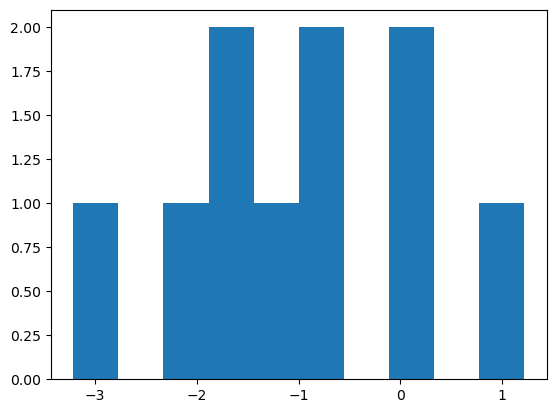

In [4]:
plt.hist(lever_hist_reward[:,-1])

In [5]:
lever_hist_reward.shape, lever_hist_reward.T.shape

((10, 10000), (10000, 10))

### Plot the walks

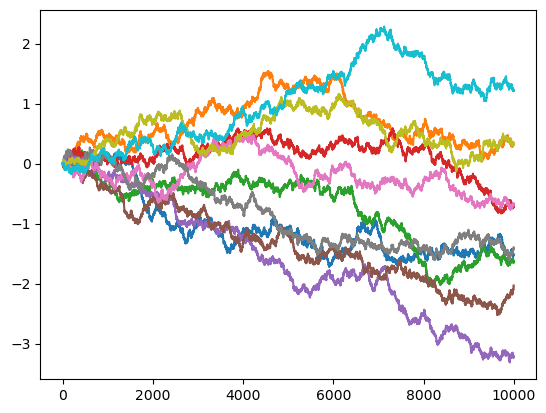

In [6]:
plt.plot(range(0,10000), lever_hist_reward.T)

# Create the action value function

(general for both cases sample average and constant step)

In [7]:
lever_count, steps = lever_hist_reward.shape
lever_count, steps

(10, 10000)

In [8]:
# Used in the function below, three different methods for selecting all positions in an array that have the same value

levers_estimated_Q = np.zeros(10)
levers_estimated_Q[3] = levers_estimated_Q[7] = 100 # Make pos 3 and 7 to 100
max_i = np.argmax(levers_estimated_Q)

# [i for i,val in enumerate(levers_estimated_Q) if val==levers_estimated_Q[max_i]] # Creates a list with a comprehension

# np.where(levers_estimated_Q == levers_estimated_Q[max_i]) # Creates a np.array using where, returns tuple, to use results select first pos of tuple
# np.where(levers_estimated_Q == levers_estimated_Q[max_i])[0]

# levers_estimated_Q == levers_estimated_Q[max_i] # Creates a true or false array where the condition is met
(levers_estimated_Q == levers_estimated_Q[max_i]).nonzero() # Returns tuple, to use results select first pos of tuple
(levers_estimated_Q == levers_estimated_Q[max_i]).nonzero()[0]

array([3, 7])

In [9]:
np.random.choice([0,1,2,3,10,20,50]) # Select a value in an array

10

In [10]:
def action_value_simple(
        lever_hist_reward, # shape = (lever_count, steps)
        epsilon = 0.01,
        method = 'sample_average', # 'sample_average' or 'constant_step_size'
        constant_step_size_alpha = 0.1
):
    lever_count, steps = lever_hist_reward.shape

    levers_estimated_Q = np.zeros(lever_count)
    levers_current_n = np.zeros(lever_count)
    A_history = []
    R_history = []

    for step in range(steps):
        # Select action
        if np.random.binomial(n=1, p=(1-epsilon)): # Select a greedy action?
            A = np.argmax(levers_estimated_Q)
            # Break ties
            # Select from all values equal to argmax, Use [0] since where returns a tuple in this form
            A_all = np.where(levers_estimated_Q == levers_estimated_Q[A])[0]
            A = np.random.choice(A_all)
        else: # Select a random action
            A = np.random.choice(lever_count)
        
        # Update values
        R = lever_hist_reward[A, step] # Actual reward per action selected
        levers_current_n[A] += 1
        if method == 'sample_average':
            levers_estimated_Q[A] = levers_estimated_Q[A] + (1/levers_current_n[A]) * (R - levers_estimated_Q[A])
        elif method == 'constant_step_size':
            levers_estimated_Q[A] = levers_estimated_Q[A] + constant_step_size_alpha * (R - levers_estimated_Q[A])
        else:
            pass

        # History
        A_history.append(A)
        R_history.append(R)
    
    return levers_estimated_Q, levers_current_n, np.array(A_history), np.array(R_history)

## Test sample average method

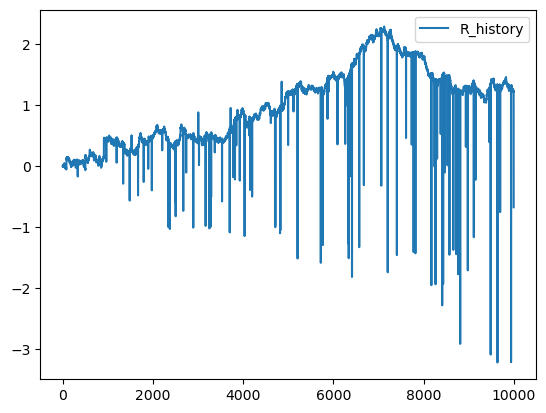

In [11]:
levers_estimated_Q, levers_current_n, A_history, R_history = action_value_simple(lever_hist_reward, epsilon=0.01, method='sample_average')

# plt.plot(range(10000), A_history)
# plt.plot(range(10000), R_history)
# plt.legend(['A_history', 'R_history'])

plt.plot(range(10000), R_history)
plt.legend(['R_history'])

## Test sample constant step size

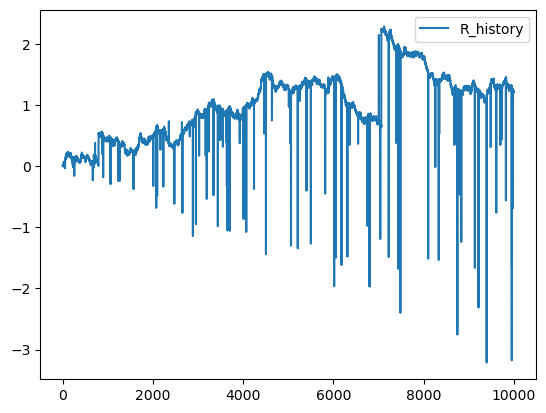

In [12]:
levers_estimated_Q, levers_current_n, A_history, R_history = action_value_simple(lever_hist_reward, epsilon=0.01, method='constant_step_size', constant_step_size_alpha=0.1)

# plt.plot(range(10000), A_history)
# plt.plot(range(10000), R_history)
# plt.legend(['A_history', 'R_history'])

plt.plot(range(10000), R_history)
plt.legend(['R_history'])

# Create a random walks generating function

In [13]:
def create_walks(
        steps=10000,
        walk_count=10,
        rdm_walk_dist_mean=0,
        rdm_walk_dist_stddev=0.01,

):
    '''Creates random walk historic values'''
    increments = np.array([np.random.normal(loc=rdm_walk_dist_mean, scale=rdm_walk_dist_stddev, size=steps-1) for i in range(walk_count)])
    increments

    walks = np.zeros([walk_count, steps])

    for lever in range(walk_count):
        for step in range(1, steps):
            walks[lever,step] = walks[lever,step-1] + increments[lever,step-1]

    return walks

In [14]:
# Check values
lever_hist_reward = create_walks()
lever_hist_reward[:,0], lever_hist_reward[:,-1]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 1.53369036e+00, -5.28405987e-01,  7.04164035e-01,  3.90003636e-01,
         2.03651281e+00,  3.51358503e-01,  1.30749952e+00, -7.73899278e-01,
        -8.59869530e-01, -9.23617697e-04]))

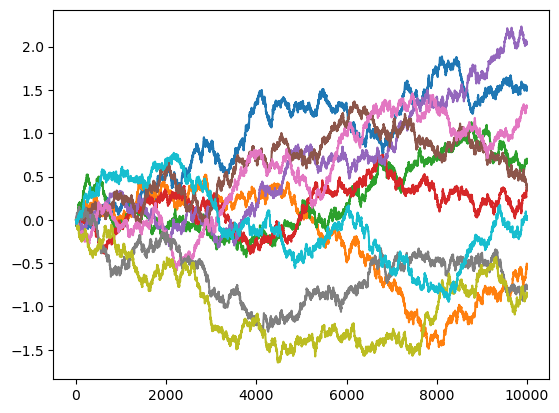

In [15]:
# Plot a walk
plt.plot(range(0,10000), lever_hist_reward.T)

# Do 2000 experiments and average

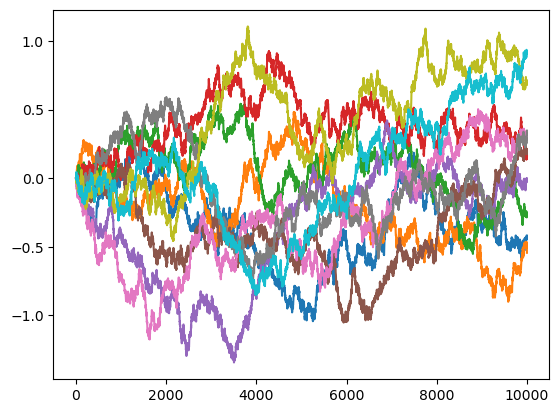

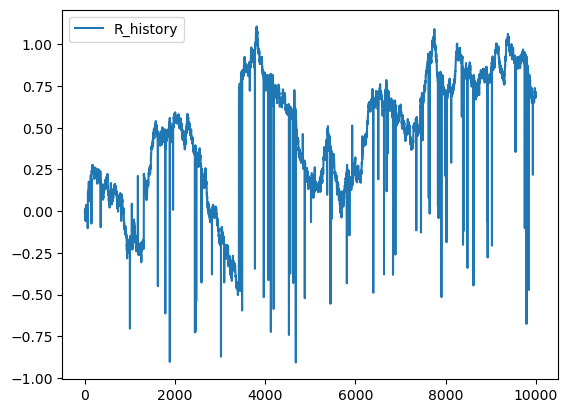

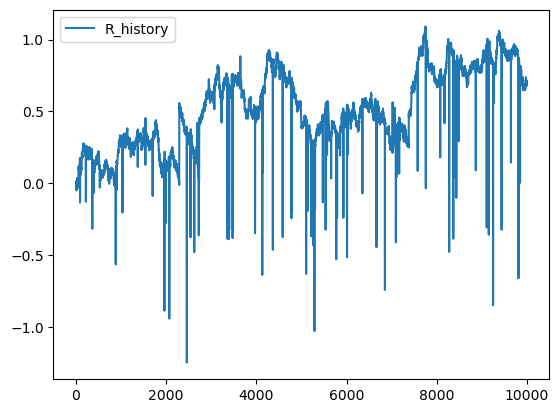

In [16]:
# See functions in action

lever_hist_reward = create_walks()
plt.plot(range(0,10000), lever_hist_reward.T)
plt.show()

levers_estimated_Q, levers_current_n, A_history, R_history = action_value_simple(lever_hist_reward, epsilon=0.01, method='sample_average')
plt.plot(range(10000), R_history)
plt.legend(['R_history'])
plt.show()

levers_estimated_Q, levers_current_n, A_history, R_history = action_value_simple(lever_hist_reward, epsilon=0.01, method='constant_step_size', constant_step_size_alpha=0.1)
plt.plot(range(10000), R_history)
plt.legend(['R_history'])
plt.show()

In [17]:
# Used in the code below

# np.argmax(lever_hist_reward, axis=0) # Best reward for every step

# print(sample_avg_A_history)
# print(const_step_A_history)

# Shows whether the optimal reward was selected
# print((np.argmax(lever_hist_reward, axis=0) == sample_avg_A_history).astype(int))
# print((np.argmax(lever_hist_reward, axis=0) == const_step_A_history).astype(int))

In [18]:
experiment_count = 2000
steps=10000
walk_count=10

sample_avg_mean = np.zeros(steps)
const_step_mean = np.zeros(steps)

sample_avg_optimal_sel_mean = np.zeros(steps)
const_step_optimal_sel_mean = np.zeros(steps)

for exp_n in range(1, experiment_count+1):
    # print('\n\nexp_n:', exp_n)

    # Create walks
    lever_hist_reward = create_walks(steps=steps, walk_count=walk_count)
    # print(lever_hist_reward)
    # break

    # Sample average method
    levers_estimated_Q, levers_current_n, sample_avg_A_history, sample_avg_R_history = action_value_simple(lever_hist_reward, epsilon=0.01, method='sample_average')
    
    # Constant step size method
    levers_estimated_Q, levers_current_n, const_step_A_history, const_step_R_history = action_value_simple(lever_hist_reward, epsilon=0.01, method='constant_step_size', constant_step_size_alpha=0.1)

    # print('sample_average_mean', sample_average_mean, type(sample_average_mean))
    # print('sample_avg_R_history', sample_avg_R_history, type(sample_avg_R_history))

    # Mean for reward, compute incrementally
    sample_avg_mean = sample_avg_mean * ((exp_n-1)/exp_n) + sample_avg_R_history / exp_n
    const_step_mean = const_step_mean * ((exp_n-1)/exp_n) + const_step_R_history / exp_n
    
    # Was it the optimal selection?
    sample_avg_optimal_sel = (np.max(lever_hist_reward, axis=0) == sample_avg_R_history).astype(int)
    const_step_optimal_sel = (np.max(lever_hist_reward, axis=0) == const_step_R_history).astype(int)

    # Mean for optimal selection, compute incrementally
    sample_avg_optimal_sel_mean = sample_avg_optimal_sel_mean * ((exp_n-1)/exp_n) + sample_avg_optimal_sel / exp_n
    const_step_optimal_sel_mean = const_step_optimal_sel_mean * ((exp_n-1)/exp_n) + const_step_optimal_sel / exp_n

    # print('sample_average_mean', sample_average_mean, type(sample_average_mean))

# sample_average_mean, constant_step_size_mean

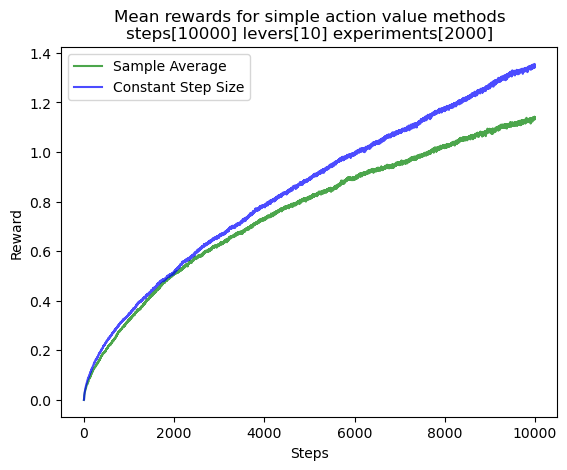

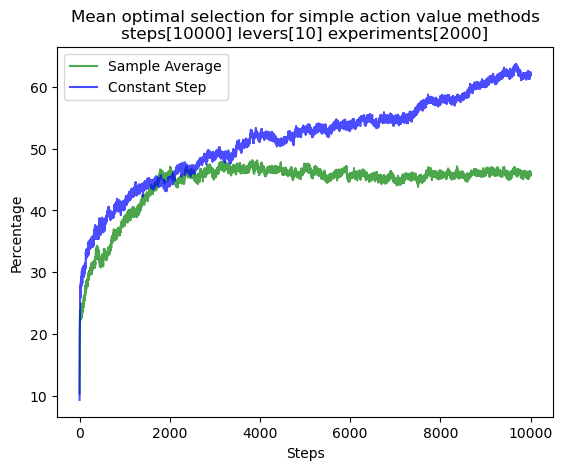

In [19]:
params = f'steps[{steps}] levers[{walk_count}] experiments[{experiment_count}]'

plt.title(f'Mean rewards for simple action value methods\n{params}')
plt.plot(range(steps), sample_avg_mean, label='Sample Average', color='g', alpha=0.7)
plt.plot(range(steps), const_step_mean, label='Constant Step Size', color='b', alpha=0.7)
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.show()

plt.title(f'Mean optimal selection for simple action value methods\n{params}')
plt.plot(range(1, steps), 100*sample_avg_optimal_sel_mean[1:], label='Sample Average', color='g', alpha=0.7)
plt.plot(range(1, steps), 100*const_step_optimal_sel_mean[1:], label='Constant Step', color='b', alpha=0.7)
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Percentage')
plt.show()

In [20]:
experiment_count = 100
steps=100000
walk_count=10

sample_avg_mean = np.zeros(steps)
const_step_mean = np.zeros(steps)

sample_avg_optimal_sel_mean = np.zeros(steps)
const_step_optimal_sel_mean = np.zeros(steps)

for exp_n in range(1, experiment_count+1):
    # print('\n\nexp_n:', exp_n)

    # Create walks
    lever_hist_reward = create_walks(steps=steps, walk_count=walk_count)
    # print(lever_hist_reward)
    # break

    # Sample average method
    levers_estimated_Q, levers_current_n, sample_avg_A_history, sample_avg_R_history = action_value_simple(lever_hist_reward, epsilon=0.01, method='sample_average')
    
    # Constant step size method
    levers_estimated_Q, levers_current_n, const_step_A_history, const_step_R_history = action_value_simple(lever_hist_reward, epsilon=0.01, method='constant_step_size', constant_step_size_alpha=0.1)

    # print('sample_average_mean', sample_average_mean, type(sample_average_mean))
    # print('sample_avg_R_history', sample_avg_R_history, type(sample_avg_R_history))

    # Mean for reward, compute incrementally
    sample_avg_mean = sample_avg_mean * ((exp_n-1)/exp_n) + sample_avg_R_history / exp_n
    const_step_mean = const_step_mean * ((exp_n-1)/exp_n) + const_step_R_history / exp_n
    
    # Was it the optimal selection?
    sample_avg_optimal_sel = (np.max(lever_hist_reward, axis=0) == sample_avg_R_history).astype(int)
    const_step_optimal_sel = (np.max(lever_hist_reward, axis=0) == const_step_R_history).astype(int)

    # Mean for optimal selection, compute incrementally
    sample_avg_optimal_sel_mean = sample_avg_optimal_sel_mean * ((exp_n-1)/exp_n) + sample_avg_optimal_sel / exp_n
    const_step_optimal_sel_mean = const_step_optimal_sel_mean * ((exp_n-1)/exp_n) + const_step_optimal_sel / exp_n

    # print('sample_average_mean', sample_average_mean, type(sample_average_mean))

# sample_average_mean, constant_step_size_mean

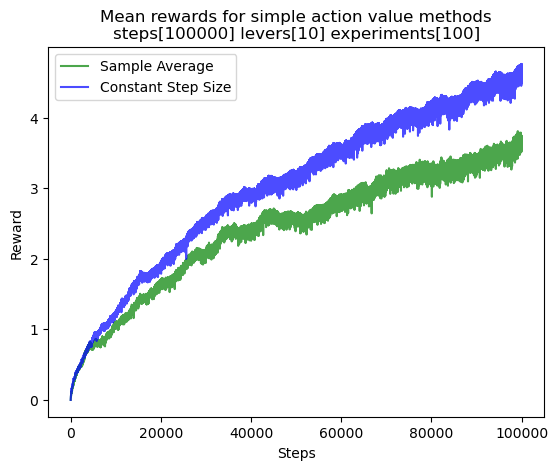

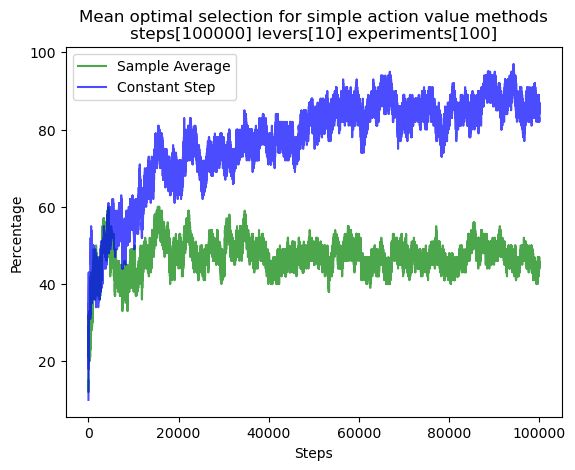

In [21]:
params = f'steps[{steps}] levers[{walk_count}] experiments[{experiment_count}]'

plt.title(f'Mean rewards for simple action value methods\n{params}')
plt.plot(range(steps), sample_avg_mean, label='Sample Average', color='g', alpha=0.7)
plt.plot(range(steps), const_step_mean, label='Constant Step Size', color='b', alpha=0.7)
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.show()

plt.title(f'Mean optimal selection for simple action value methods\n{params}')
plt.plot(range(1, steps), 100*sample_avg_optimal_sel_mean[1:], label='Sample Average', color='g', alpha=0.7)
plt.plot(range(1, steps), 100*const_step_optimal_sel_mean[1:], label='Constant Step', color='b', alpha=0.7)
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Percentage')
plt.show()